# Using the model server to do an inference

In this notebook we are going to use the gRPC inference endpoint to query our model.

## First, make sure we have the libraries we need
Have a look at requirements.txt to see which libraries are used.

In [1]:
!pip install -qr requirements.txt

# Only if you don't have PyTorch installed
#!pip install -q -r requirements-torch-cpu.txt

## Import the libraries and module where we have all helper code for doing the inference

In [2]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from remote_infer_grpc import ort_v5

## Enter the grpc host name you got from the Model Serving configuration
(remove the grpc:// leading part and the port from the grpcURL you noted previously)
The port, the model name and the classes definition file are already filled in.

In [3]:
grpc_host = 'replace_me' # e.g. 'modelmesh-serving.my-project.svc.cluster.local'
grpc_port = 8033
model_name = 'coolstore'
classes_file = 'classes.yaml'

## Now set the parameters for the inference

In [4]:
# 1. The image you want to analyze
image_path='images/RHODS_cool_store.png' # You can replace this with an image you upload

# 2. Confidence threshold, between 0 and 1 (detections with less score won't be retained)
conf = 0.2

# 3. Intersection over Union Threshold, between 0 and 1 (cleanup overlapping boxes)
iou = 0.6

## Launch the inference and show the result

Predictions format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]
Predictions: tensor([[467.8682, 182.5234, 619.2140, 286.0022,   0.8629,   1.0000],
        [ 17.3808, 154.5190, 331.7370, 463.0674,   0.8052,   2.0000]])


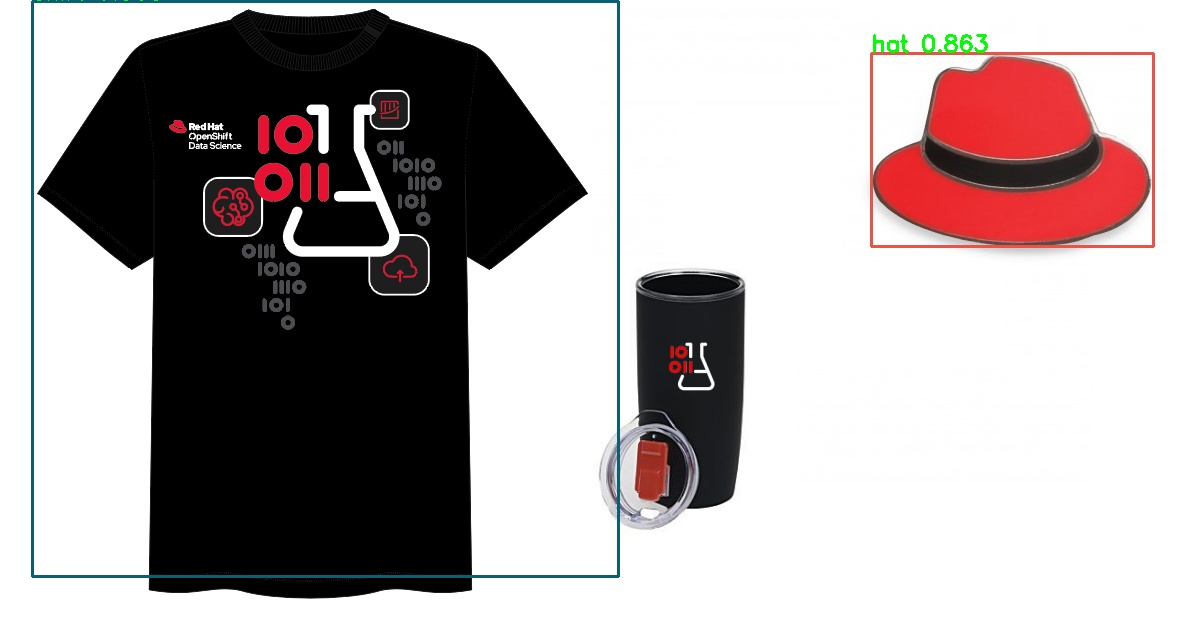

In [5]:

infer=ort_v5(grpc_host, grpc_port, model_name, 640, classes_file)
img, out, result = infer(image_path, conf, iou)
print(f'{result}')
print('Predictions:')
print(out)
print('Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]')
print('The coordinates are relative to a letterboxed representation of the image of size 640x640')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.axis('off')
plt.imshow(img);

## Perfect, we can see that the model serving API is working!

You can now get back to the instructions.